【知识目标】
1. 回顾灰度处理
2. 回顾中值滤波
3. 回顾阈值处理
4. 回顾霍夫圆形检测

【项目描述】

通过图像处理方法实现每个棋子的识别，并通过判断像素值来区分出黑色和白色。
要识别的图像如下图：

<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/weiqi1_1.jpeg"  width="200" height="260" ></div>

【涉及到的方法说明】

OpenCV提供了方法cv2.medianBlur实现中值滤波，该方法的语法格式为：
dst=cv2.medianBlur（src,ksize）
式中：
 - dst 表示返回值，进行中值滤波处理的结果图像。
 - src 是原始输入图像。
 - ksize 是滤波核的大小。滤波核大小是指在滤波处理过程中所选择的邻域图像的高度和宽度。需要注意，核大小必须是比1大的奇数，比如3、5、7等。
 
中值滤波与其他的滤波方式不同，没有采用加权求均值的方式计算滤波结果。它用邻域内所有像素值的中间值来替代当前像素点的像素值。中值滤波会取当前像素点及其周围临近像素点的像素值，将这些像素值排序，然后将位于中间位置的像素值作为当前像素点的像素值。如下左图中的第4行第4列的像素点，计算它的中值滤波值。将其邻域设置为3×3大小，对其3×3邻域内像素点的像素值进行排序（升序降序均可），按升序排序后得到序列值为：[66,78,90,91,93,94,95,97,101]。在该序列中，处于中心位置（也叫中心点或中值点）的值是“93”，因此用该值替换原来的像素值78，作为当前点的新像素值，处理结果如下右图所示。
<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/medianBlur1.png"  width="200" height="260" ></div>
<div style="float:left;border:solid 1px 000;margin:2px;"><img src="../pic/medianBlur2.png" width="200" height="260" ></div>

<div style="float:none;clear:both;">

</div>


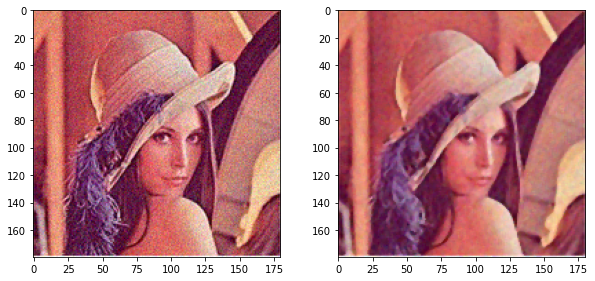

In [2]:
#中值滤波例子
import cv2
from matplotlib import pyplot as plt

image = cv2.imread("../pic/picgaosi.png")

boxed = cv2.medianBlur(image,3)

#matlib显示方式
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(cv2.cvtColor(boxed,cv2.COLOR_BGR2RGB))

从结果图中可以看到，由于没有进行均值处理，中值滤波不存在均值滤波等滤波方式带来的细节模糊问题。在中值滤波处理中，噪声成分很难被选上，所以可以在几乎不影响原有图像的情况下去除全部噪声。但是由于需要进行排序等操作，中值滤波需要的运算量较大。

OpenCV提供了方法cv2.HoughCircles实现圆检测。该方法的语法格式为：
circles=cv2.HoughCircles(image,method,dp,minDist,param1,param2,minRadius,maxRadius)
式中：
 - circles 表示返回值，返回值为numpy.ndarray类型的元素构成，是圆心坐标和半径构成的数组。
 - image表示原始输入图像。
 - method表示检测方法，只能使用cv2.HOUGH_GRADIENT
 - dp表示累加器分辨率与图像分辨率的比例，1就表示他们具有相同的分辨率。
 - minDist表示探测到的圆的中心之间的最小距离.如果参数太小，除了真实的一个外，还可能错误地检测到多个相邻圆.如果它太大，可能会漏掉一些圆。
 - param1第一个特定参数.如果是CV_HOUGH_GRADIENT的情况下，是传递给Canny边缘检测器中较高阈值的参数（低的参数小两倍）
 - param2第二个特定参数.如果是CV_HOUGH_GRADIENT的情况下，它是检测阶段圆中心的累加器阈值。它越小，就会发现越多的假圆.与较大的累加器值相对应的圆，将首先返回。
 - minRadius表示最小半径。
 - maxRadius表示最大半径。


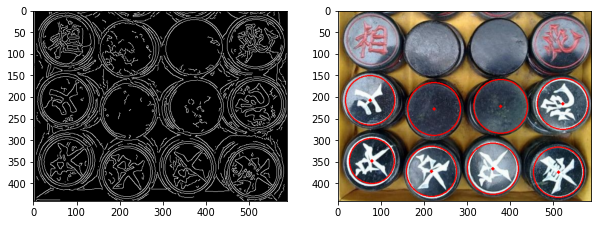

In [4]:
#霍夫变换圆形检测
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("../pic/pic13.png")

# 彩色图片灰度化
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#高斯处理
gaussian = cv2. GaussianBlur(gray, (7, 7), 0)

# 执行边缘检测
edges = cv2.Canny(gaussian, 30, 60)
#cv2.imshow('Edges', edges)

circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT,1,120,
                            param1=60,param2=125,minRadius=30,maxRadius=220)
# 确保至少发现一个圆
if circles is not None:
    # 进行取整操作
    circles = np.int0(np.around(circles))
    # 循环遍历所有的坐标和半径
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (0, 0, 255), 2)  # 画出外圆
        cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)  # 画出圆心

#cv2.imshow('Result', image)

#cv2.waitKey()
#cv2.destroyAllWindows()
#matlib显示方式
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(edges,cmap='gray')
plt.subplot(222)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

可以看出识别出了大多数的圆。不同的环境下需要调试每个参数的值来适配。

In [5]:
import cv2
from matplotlib import pyplot as plt

In [6]:
#前一讲中计算出来的棋盘交点坐标
crossArr= [[(23, 23), (47, 23), (72, 23), (97, 23), (121, 23), (146, 23), (171, 23), (196, 23), (220, 23), (245, 23), (270, 23), (294, 23), (319, 23), (344, 23), (368, 23), (369, 23), (393, 23), (418, 23), (443, 23), (467, 23)]
, [(23, 47), (47, 47), (72, 47), (97, 47), (121, 47), (146, 47), (171, 47), (196, 47), (220, 47), (245, 47), (270, 47), (294, 47), (319, 47), (344, 47), (368, 47), (369, 47), (393, 47), (418, 47), (443, 47), (467, 47)], [(23, 72), (47, 72), (72, 72), (97, 72), (121, 72), (146, 72), (171, 72), (196, 72), (220, 72), (245, 72), (270, 72), (294, 72), (319, 72), (344, 72), (368, 72), (369, 72), (393, 72), (418, 72), (443, 72), (467, 72)], [(23, 97), (47, 97), (72, 97), (97, 97), (121, 97), (146, 97), (171, 97), (196, 97), (220, 97), (245, 97), (270, 97), (294, 97), (319, 97), (344, 97), (368, 97), (369, 97), (393, 97), (418, 97), (443, 97), (467, 97)], [(23, 122), (47, 122), (72, 122), (97, 122), (121, 122), (146, 122), (171, 122), (196, 122), (220, 122), (245, 122), (270, 122), (294, 122), (319, 122), (344, 122), (368, 122), (369, 122), (393, 122), (418, 122), (443, 122), (467, 122)], [(23, 146), (47, 146), (72, 146), (97, 146), (121, 146), (146, 146), (171, 146), (196, 146), (220, 146), (245, 146), (270, 146), (294, 146), (319, 146), (344, 146), (368, 146), (369, 146), (393, 146), (418, 146), (443, 146), (467, 146)], [(23, 171), (47, 171), (72, 171), (97, 171), (121, 171), (146, 171), (171, 171), (196, 171), (220, 171), (245, 171), (270, 171), (294, 171), (319, 171), (344, 171), (368, 171), (369, 171), (393, 171), (418, 171), (443, 171), (467, 171)], [(23, 196), (47, 196), (72, 196), (97, 196), (121, 196), (146, 196), (171, 196), (196, 196), (220, 196), (245, 196), (270, 196), (294, 196), (319, 196), (344, 196), (368, 196), (369, 196), (393, 196), (418, 196), (443, 196), (467, 196)], [(23, 220), (47, 220), (72, 220), (97, 220), (121, 220), (146, 220), (171, 220), (196, 220), (220, 220), (245, 220), (270, 220), (294, 220), (319, 220), (344, 220), (368, 220), (369, 220), (393, 220), (418, 220), (443, 220), (467, 220)], [(23, 245), (47, 245), (72, 245), (97, 245), (121, 245), (146, 245), (171, 245), (196, 245), (220, 245), (245, 245), (270, 245), (294, 245), (319, 245), (344, 245), (368, 245), (369, 245), (393, 245), (418, 245), (443, 245), (467, 245)], [(23, 270), (47, 270), (72, 270), (97, 270), (121, 270), (146, 270), (171, 270), (196, 270), (220, 270), (245, 270), (270, 270), (294, 270), (319, 270), (344, 270), (368, 270), (369, 270), (393, 270), (418, 270), (443, 270), (467, 270)], [(23, 295), (47, 295), (72, 295), (97, 295), (121, 295), (146, 295), (171, 295), (196, 295), (220, 295), (245, 295), (270, 295), (294, 295), (319, 295), (344, 295), (368, 295), (369, 295), (393, 295), (418, 295), (443, 295), (467, 295)], [(23, 319), (47, 319), (72, 319), (97, 319), (121, 319), (146, 319), (171, 319), (196, 319), (220, 319), (245, 319), (270, 319), (294, 319), (319, 319), (344, 319), (368, 319), (369, 319), (393, 319), (418, 319), (443, 319), (467, 319)], [(23, 344), (47, 344), (72, 344), (97, 344), (121, 344), (146, 344), (171, 344), (196, 344), (220, 344), (245, 344), (270, 344), (294, 344), (319, 344), (344, 344), (368, 344), (369, 344), (393, 344), (418, 344), (443, 344), (467, 344)], [(23, 369), (47, 369), (72, 369), (97, 369), (121, 369), (146, 369), (171, 369), (196, 369), (220, 369), (245, 369), (270, 369), (294, 369), (319, 369), (344, 369), (368, 369), (369, 369), (393, 369), (418, 369), (443, 369), (467, 369)], [(23, 393), (47, 393), (72, 393), (97, 393), (121, 393), (146, 393), (171, 393), (196, 393), (220, 393), (245, 393), (270, 393), (294, 393), (319, 393), (344, 393), (368, 393), (369, 393), (393, 393), (418, 393), (443, 393), (467, 393)], [(23, 418), (47, 418), (72, 418), (97, 418), (121, 418), (146, 418), (171, 418), (196, 418), (220, 418), (245, 418), (270, 418), (294, 418), (319, 418), (344, 418), (368, 418), (369, 418), (393, 418), (418, 418), (443, 418), (467, 418)]]
print(crossArr)

[[(23, 23), (47, 23), (72, 23), (97, 23), (121, 23), (146, 23), (171, 23), (196, 23), (220, 23), (245, 23), (270, 23), (294, 23), (319, 23), (344, 23), (368, 23), (369, 23), (393, 23), (418, 23), (443, 23), (467, 23)], [(23, 47), (47, 47), (72, 47), (97, 47), (121, 47), (146, 47), (171, 47), (196, 47), (220, 47), (245, 47), (270, 47), (294, 47), (319, 47), (344, 47), (368, 47), (369, 47), (393, 47), (418, 47), (443, 47), (467, 47)], [(23, 72), (47, 72), (72, 72), (97, 72), (121, 72), (146, 72), (171, 72), (196, 72), (220, 72), (245, 72), (270, 72), (294, 72), (319, 72), (344, 72), (368, 72), (369, 72), (393, 72), (418, 72), (443, 72), (467, 72)], [(23, 97), (47, 97), (72, 97), (97, 97), (121, 97), (146, 97), (171, 97), (196, 97), (220, 97), (245, 97), (270, 97), (294, 97), (319, 97), (344, 97), (368, 97), (369, 97), (393, 97), (418, 97), (443, 97), (467, 97)], [(23, 122), (47, 122), (72, 122), (97, 122), (121, 122), (146, 122), (171, 122), (196, 122), (220, 122), (245, 122), (270, 122)

In [7]:
#方便看效果提取出来的展示结果的方法
def showresult(str,image):
#     cv2.imshow(str, image)
#     cv2.waitKey()
#     cv2.destroyAllWindows()
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

下面的方法是识别棋盘上的棋子并显示出对应棋子的颜色和索引值。显示原理就是先通过中值滤波处理原图，再做一次灰度处理，并通过阈值处理把图像做成二值化图，最后在霍夫变换圆形检测。由于是二值图所以看起很容易判断出255像素值为白色，0像素值为黑色棋子。

In [8]:
def findchess(image):
    blur = cv2.medianBlur(image, 3)

    # 彩色图片灰度化
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    # cv2.imshow('gray', gray)

    ret, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    #cv2.imshow('threshold', threshold)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 10,
                               param1=100, param2=20, minRadius=10, maxRadius=15)

    # 确保至少发现一个圆
    if circles is not None:
        # 进行取整操作
        circles = np.int0(np.around(circles))
        # 循环遍历所有的坐标和半径
        for i in circles[0, :]:
            print((i[1], i[0]), threshold[i[1], i[0]])

            modifyaxis(i[1], i[0], threshold[i[1], i[0]])

            cv2.circle(image, (i[0], i[1]), i[2], (0, 0, 255), 2)  # 画出外圆
            cv2.circle(image, (i[0], i[1]), 2, (0, 0, 255), 3)  # 画出圆心

        showresult('image', image)

In [10]:
imagechess = cv2.imread("../pic/weiqi1_1.jpeg")

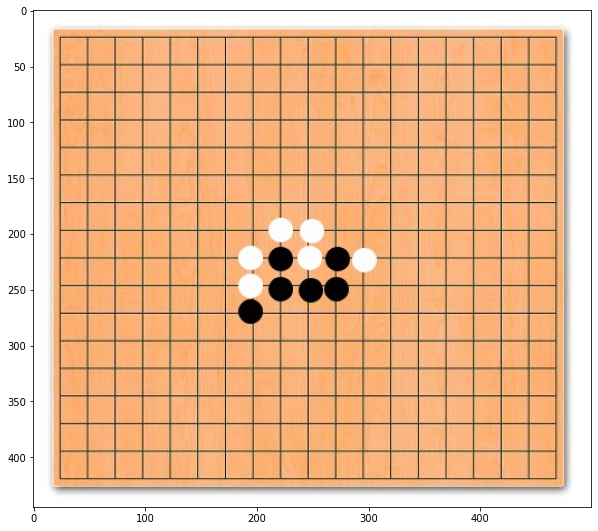

In [11]:
showresult("Origin",imagechess)

In [16]:
state_cur = []

In [17]:
# 矫正棋子圆心坐标为交点，因为棋子不能保证正好放在交点位置，所以需要根据棋子的圆心坐标和棋盘的交点坐标进行比较，
#最终把棋子匹配到对应的交点上
def modifyaxis(xaxis, yaxis, value):
    if value == 255:
        value = -1
    else:
        value = 1

    countx = len(crossArr)
    county = len(crossArr[0])
    index_xaxis = []
    index_yaxis = []

    for y_index in range(0, county):
        value_y = crossArr[0][y_index][0]
        if abs(xaxis - crossArr[0][y_index][0]) < 10:
            index_yaxis.append(y_index)

    for x_index in range(0, countx):
        value_x = crossArr[x_index][0][1]
        if abs(yaxis - crossArr[x_index][0][1]) < 10:
            index_xaxis.append(x_index)

    state_cur.append([index_yaxis[0], index_xaxis[0]])


(250, 222) 0
(270, 192) 0
(252, 272) 0
(220, 194) 0
(224, 248) 0
(248, 248) 0
(226, 296) 0
(196, 220) 0
(198, 252) 0
(224, 272) 0
(246, 196) 0
(220, 222) 0


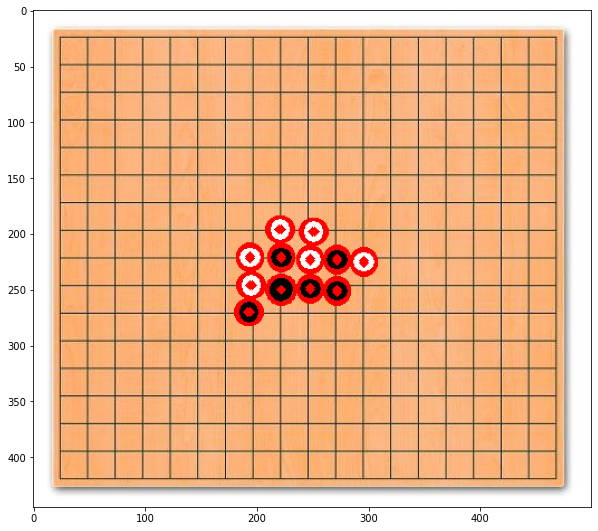

In [18]:
findchess(imagechess)

In [20]:
print (state_cur)

[[9, 8], [10, 7], [9, 10], [8, 7], [8, 9], [9, 9], [8, 11], [7, 8], [7, 9], [8, 10], [9, 7], [8, 8]]
